In [1]:
from demo  import jdt_db
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import time
from snapshot_selenium import snapshot
from sklearn.ensemble import RandomForestClassifier # RF库
from pyecharts.charts import Bar3D
from pyecharts.globals import CurrentConfig, NotebookType
CurrentConfig.NOTEBOOK_TYPE = NotebookType.JUPYTER_LAB

In [2]:
min_time_1 = "'2022-04-01 00:00:00'"
min_time_2 = "'2022-05-01 00:00:00'"
max_time_1 = "'2022-07-01 00:00:00'"
max_time_2 = "'2022-08-01 00:00:00'"

In [3]:
# 数据导入
rfm_up = "SELECT	user_id,	user_name,	created_at,	money ,user_upgrade_group   FROM	jdt_user_upgrade_log  WHERE  created_at >= " + min_time_2 + " AND created_at <" + max_time_2 
rfm_price ="   SELECT   a.user_id, b.truename,FROM_UNIXTIME( a.pay_time, '%Y-%m-%d  %H:%i:%s' ) AS 'time',a.pay_price,  b.group_id    FROM   	jdt_litejdtstore_order AS a   	LEFT JOIN jdt_user AS b ON a.user_id = b.id    WHERE   	FROM_UNIXTIME( a.pay_time, '%Y-%m-%d %H:%i:%s' ) >= " + min_time_2 + "    	AND FROM_UNIXTIME( a.pay_time, '%Y-%m-%d %H:%i:%s' ) < " + max_time_2  + "    GROUP BY   	order_no"
rfm_logo ="   SELECT   user_id,   count(user_id) as counts,max(created_at) as created_at   FROM   jdt_user_logon_in   WHERE   created_at  >=" + min_time_2 + "     AND  created_at < " + max_time_2  + "       GROUP BY   user_id"

In [4]:
print(rfm_up)
print('*'* 60)
print(rfm_price)
print('*'* 60)
print(rfm_logo)

SELECT	user_id,	user_name,	created_at,	money ,user_upgrade_group   FROM	jdt_user_upgrade_log  WHERE  created_at >= '2022-05-01 00:00:00' AND created_at <'2022-08-01 00:00:00'
************************************************************
   SELECT   a.user_id, b.truename,FROM_UNIXTIME( a.pay_time, '%Y-%m-%d  %H:%i:%s' ) AS 'time',a.pay_price,  b.group_id    FROM   	jdt_litejdtstore_order AS a   	LEFT JOIN jdt_user AS b ON a.user_id = b.id    WHERE   	FROM_UNIXTIME( a.pay_time, '%Y-%m-%d %H:%i:%s' ) >= '2022-05-01 00:00:00'    	AND FROM_UNIXTIME( a.pay_time, '%Y-%m-%d %H:%i:%s' ) < '2022-08-01 00:00:00'    GROUP BY   	order_no
************************************************************
   SELECT   user_id,   count(user_id) as counts,max(created_at) as created_at   FROM   jdt_user_logon_in   WHERE   created_at  >='2022-05-01 00:00:00'     AND  created_at < '2022-08-01 00:00:00'       GROUP BY   user_id


In [5]:
# 升学人数
data1 = jdt_db(rfm_up)
# 商品购买
data2 = jdt_db(rfm_price)
# 登录频次
data3 = jdt_db(rfm_logo)

D:\anaconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


1.2920546531677246


D:\anaconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


0.3489410877227783


D:\anaconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


12.440387487411499


In [6]:
data2 = data2.rename(columns={'truename':'user_name','time':'created_at','pay_price':'money','group_id':'user_upgrade_group'})

In [7]:
total_data = pd.concat([data1,data2],axis = 0)

In [8]:
total_data

,user_id,user_name,created_at,money,user_upgrade_group
0,1927744,张矜斓,2022-05-01 07:55:03,199.0,2
1,1927744,张矜斓,2022-05-01 08:08:11,4999.0,3
2,1927663,18980361458,2022-05-01 09:05:07,499.0,2
3,2060881,叶德新,2022-05-01 09:08:32,499.0,2
4,2049494,18780927768,2022-05-01 09:12:08,199.0,2
...,...,...,...,...,...
1198,150930,李英,2022-07-27 12:40:23,5.5,5
1199,123634,李敏,2022-07-27 13:19:30,30.0,3
1200,170638,麦兰花,2022-07-27 14:09:48,30.0,4
1201,170638,麦兰花,2022-07-27 14:11:02,30.0,4


In [9]:
total_data =pd.merge(total_data,data3,on='user_id',how = 'left')

In [11]:
total_data

,user_id,user_name,created_at_x,money,user_upgrade_group,counts,created_at_y
0,1927744,张矜斓,2022-05-01 07:55:03,199.0,2,10.0,2022-07-25 12:14:05
1,1927744,张矜斓,2022-05-01 08:08:11,4999.0,3,10.0,2022-07-25 12:14:05
2,1927663,18980361458,2022-05-01 09:05:07,499.0,2,2.0,2022-06-07 08:57:45
3,2060881,叶德新,2022-05-01 09:08:32,499.0,2,2.0,2022-05-24 12:38:09
4,2049494,18780927768,2022-05-01 09:12:08,199.0,2,6.0,2022-06-30 11:08:38
...,...,...,...,...,...,...,...
25098,150930,李英,2022-07-27 12:40:23,5.5,5,9.0,2022-07-22 19:29:28
25099,123634,李敏,2022-07-27 13:19:30,30.0,3,10.0,2022-07-27 13:14:42
25100,170638,麦兰花,2022-07-27 14:09:48,30.0,4,6.0,2022-07-24 20:10:10
25101,170638,麦兰花,2022-07-27 14:11:02,30.0,4,6.0,2022-07-24 20:10:10


In [12]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25103 entries, 0 to 25102
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   user_id             25103 non-null  int64         
 1   user_name           25103 non-null  object        
 2   created_at_x        25103 non-null  object        
 3   money               25103 non-null  float64       
 4   user_upgrade_group  25103 non-null  int64         
 5   counts              25043 non-null  float64       
 6   created_at_y        25043 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 1.5+ MB


In [13]:
total_data['created_at'] = pd.to_datetime(total_data['created_at_x'])

In [14]:
total_data

,user_id,user_name,created_at_x,money,user_upgrade_group,counts,created_at_y,created_at
0,1927744,张矜斓,2022-05-01 07:55:03,199.0,2,10.0,2022-07-25 12:14:05,2022-05-01 07:55:03
1,1927744,张矜斓,2022-05-01 08:08:11,4999.0,3,10.0,2022-07-25 12:14:05,2022-05-01 08:08:11
2,1927663,18980361458,2022-05-01 09:05:07,499.0,2,2.0,2022-06-07 08:57:45,2022-05-01 09:05:07
3,2060881,叶德新,2022-05-01 09:08:32,499.0,2,2.0,2022-05-24 12:38:09,2022-05-01 09:08:32
4,2049494,18780927768,2022-05-01 09:12:08,199.0,2,6.0,2022-06-30 11:08:38,2022-05-01 09:12:08
...,...,...,...,...,...,...,...,...
25098,150930,李英,2022-07-27 12:40:23,5.5,5,9.0,2022-07-22 19:29:28,2022-07-27 12:40:23
25099,123634,李敏,2022-07-27 13:19:30,30.0,3,10.0,2022-07-27 13:14:42,2022-07-27 13:19:30
25100,170638,麦兰花,2022-07-27 14:09:48,30.0,4,6.0,2022-07-24 20:10:10,2022-07-27 14:09:48
25101,170638,麦兰花,2022-07-27 14:11:02,30.0,4,6.0,2022-07-24 20:10:10,2022-07-27 14:11:02


In [15]:
total_data['max_time'] = pd.to_datetime(datetime.datetime.now() )

In [16]:
total_data = total_data[total_data['user_upgrade_group'] < 4]

In [17]:
total_data = total_data[total_data['money'] > 0]

In [18]:
total_data['date_interval'] = total_data['max_time'] - total_data['created_at']

In [19]:
total_data['month'] = total_data['created_at'].dt.month

In [20]:
total_data['date_interval'] = total_data['date_interval'].apply(lambda x: x.days)

In [21]:
total_data

,user_id,user_name,created_at_x,money,user_upgrade_group,counts,created_at_y,created_at,max_time,date_interval,month
0,1927744,张矜斓,2022-05-01 07:55:03,199.0,2,10.0,2022-07-25 12:14:05,2022-05-01 07:55:03,2022-07-27 16:24:06.707690,87,5
1,1927744,张矜斓,2022-05-01 08:08:11,4999.0,3,10.0,2022-07-25 12:14:05,2022-05-01 08:08:11,2022-07-27 16:24:06.707690,87,5
2,1927663,18980361458,2022-05-01 09:05:07,499.0,2,2.0,2022-06-07 08:57:45,2022-05-01 09:05:07,2022-07-27 16:24:06.707690,87,5
3,2060881,叶德新,2022-05-01 09:08:32,499.0,2,2.0,2022-05-24 12:38:09,2022-05-01 09:08:32,2022-07-27 16:24:06.707690,87,5
4,2049494,18780927768,2022-05-01 09:12:08,199.0,2,6.0,2022-06-30 11:08:38,2022-05-01 09:12:08,2022-07-27 16:24:06.707690,87,5
...,...,...,...,...,...,...,...,...,...,...,...
25090,1752688,陈秀丽,2022-07-24 18:00:39,30.0,3,10.0,2022-07-27 11:26:46,2022-07-24 18:00:39,2022-07-27 16:24:06.707690,2,7
25094,9689,黄燕英,2022-07-26 17:26:13,5.5,3,6.0,2022-07-26 17:17:49,2022-07-26 17:26:13,2022-07-27 16:24:06.707690,0,7
25095,1844251,温小景,2022-07-26 17:49:02,30.0,3,11.0,2022-07-26 17:47:19,2022-07-26 17:49:02,2022-07-27 16:24:06.707690,0,7
25099,123634,李敏,2022-07-27 13:19:30,30.0,3,10.0,2022-07-27 13:14:42,2022-07-27 13:19:30,2022-07-27 16:24:06.707690,0,7


In [22]:
rfm_gb = total_data.groupby(['month','user_id'],as_index=False).agg(
    {'date_interval': 'min',  # 计算最近一次订单时间
     'counts': 'max', # 计算订单频率
     'money': 'sum',
    'user_upgrade_group':'max'})  # 计算订单总金额

In [23]:
rfm_gb_group = rfm_gb[rfm_gb['user_upgrade_group']<4]

In [24]:
rfm_gb_group

,month,user_id,date_interval,counts,money,user_upgrade_group
0,5,1570,67,6.0,499.00,2
1,5,4209,64,2.0,499.00,2
2,5,7238,82,3.0,4999.00,3
3,5,7586,71,16.0,4999.00,3
4,5,8680,82,13.0,49.69,2
...,...,...,...,...,...,...
18531,7,2201492,0,1.0,499.00,2
18532,7,2201505,0,3.0,499.00,2
18533,7,2201516,0,2.0,199.00,2
18534,7,2201631,0,2.0,199.00,2


In [25]:
rfm_gb.columns =  ['month','user_id','r','f','m','user_group']
rfm_gb

,month,user_id,r,f,m,user_group
0,5,1570,67,6.0,499.00,2
1,5,4209,64,2.0,499.00,2
2,5,7238,82,3.0,4999.00,3
3,5,7586,71,16.0,4999.00,3
4,5,8680,82,13.0,49.69,2
...,...,...,...,...,...,...
18531,7,2201492,0,1.0,499.00,2
18532,7,2201505,0,3.0,499.00,2
18533,7,2201516,0,2.0,199.00,2
18534,7,2201631,0,2.0,199.00,2


In [26]:
desc_pd = rfm_gb.iloc[:,2:].describe().T
desc_pd

,count,mean,std,min,25%,50%,75%,max
r,18536.0,46.484786,25.986936,0.0,25.0,46.0,72.0,87.0
f,18486.0,6.371578,6.024549,1.0,3.0,5.0,8.0,120.0
m,18536.0,1975.133513,2301.403300,5.5,199.0,499.0,4999.0,10197.0
user_group,18536.0,2.344249,0.479656,1.0,2.0,2.0,3.0,3.0


In [27]:
r_bins = [-1,24,70,86] # 注意起始边界小于最小值
f_bins = [0,3,8,118] 
m_bins = [5,199,4999,10197]

In [28]:
# rfm_merge = pd.merge(rfm_gb,total_data,on='user_id',how='inner')

In [29]:
rfm_merge = rfm_gb

In [30]:
rfm_merge.isnull().any()

month         False
user_id       False
r             False
f              True
m             False
user_group    False
dtype: bool

In [31]:
rfm_merge['f'] = rfm_merge['f'].fillna(1)

In [32]:
# 计算权重因子
clf = RandomForestClassifier()
clf = clf.fit(rfm_merge[['r','f','m']],rfm_merge['user_group'])
weights = clf.feature_importances_
print('feature importance:',weights)

feature importance: [0.04275792 0.10026084 0.85698124]


In [33]:
rfm_gb

,month,user_id,r,f,m,user_group
0,5,1570,67,6.0,499.00,2
1,5,4209,64,2.0,499.00,2
2,5,7238,82,3.0,4999.00,3
3,5,7586,71,16.0,4999.00,3
4,5,8680,82,13.0,49.69,2
...,...,...,...,...,...,...
18531,7,2201492,0,1.0,499.00,2
18532,7,2201505,0,3.0,499.00,2
18533,7,2201516,0,2.0,199.00,2
18534,7,2201631,0,2.0,199.00,2


In [34]:
# 计算分箱得分
rfm_gb['r_score'] = pd.cut(rfm_gb['r'], r_bins, labels=[i for i in range(len(r_bins)-1,0,-1)])  

rfm_gb['m_score'] = pd.cut(rfm_gb['m'], m_bins, labels=[i+1 for i in range(len(m_bins)-1)])  

rfm_gb['f_score'] = pd.cut(rfm_gb['f'], f_bins, labels=[i+1 for i in range(len(f_bins)-1)]) 

In [35]:
rfm_gb

,month,user_id,r,f,m,user_group,r_score,m_score,f_score
0,5,1570,67,6.0,499.00,2,2,2,2
1,5,4209,64,2.0,499.00,2,2,2,1
2,5,7238,82,3.0,4999.00,3,1,2,1
3,5,7586,71,16.0,4999.00,3,1,2,3
4,5,8680,82,13.0,49.69,2,1,1,3
...,...,...,...,...,...,...,...,...,...
18531,7,2201492,0,1.0,499.00,2,3,2,1
18532,7,2201505,0,3.0,499.00,2,3,2,1
18533,7,2201516,0,2.0,199.00,2,3,1,1
18534,7,2201631,0,2.0,199.00,2,3,1,1


In [36]:
rfm_gb.drop_duplicates(subset='m_score',inplace=False)


,month,user_id,r,f,m,user_group,r_score,m_score,f_score
0,5,1570,67,6.0,499.00,2,2,2,2
4,5,8680,82,13.0,49.69,2,1,1,3
18,5,38162,58,58.0,5498.00,3,2,3,3


In [37]:
rfm_gb = rfm_gb.apply(np.int32) 
rfm_gb['rfm_score'] = rfm_gb['r_score'] * weights[0] + rfm_gb['f_score'] * weights[1] + rfm_gb['m_score'] * weights[2]

In [38]:
rfm_gb

,month,user_id,r,f,m,user_group,r_score,m_score,f_score,rfm_score
0,5,1570,67,6,499,2,2,2,2,2.000000
1,5,4209,64,2,499,2,2,2,1,1.899739
2,5,7238,82,3,4999,3,1,2,1,1.856981
3,5,7586,71,16,4999,3,1,2,3,2.057503
4,5,8680,82,13,49,2,1,1,3,1.200522
...,...,...,...,...,...,...,...,...,...,...
18531,7,2201492,0,1,499,2,3,2,1,1.942497
18532,7,2201505,0,3,499,2,3,2,1,1.942497
18533,7,2201516,0,2,199,2,3,1,1,1.085516
18534,7,2201631,0,2,199,2,3,1,1,1.085516


In [39]:
rfm_gb['r_score'] = rfm_gb['r_score'].astype(np.str)
rfm_gb['f_score'] = rfm_gb['f_score'].astype(np.str)
rfm_gb['m_score'] = rfm_gb['m_score'].astype(np.str)
rfm_gb['rfm_group'] = rfm_gb['r_score'].str.cat(rfm_gb['f_score']).str.cat(rfm_gb['m_score'])

C:\Users\cy176\AppData\Local\Temp\ipykernel_10468\2199335445.py:1: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rfm_gb['r_score'] = rfm_gb['r_score'].astype(np.str)
C:\Users\cy176\AppData\Local\Temp\ipykernel_10468\2199335445.py:2: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rfm_gb['f_score'] = rfm_gb['f_score'].astype(np.str)
C:\Users\cy176\AppData\Loc

In [40]:
rfm_gb

,month,user_id,r,f,m,user_group,r_score,m_score,f_score,rfm_score,rfm_group
0,5,1570,67,6,499,2,2,2,2,2.000000,222
1,5,4209,64,2,499,2,2,2,1,1.899739,212
2,5,7238,82,3,4999,3,1,2,1,1.856981,112
3,5,7586,71,16,4999,3,1,2,3,2.057503,132
4,5,8680,82,13,49,2,1,1,3,1.200522,131
...,...,...,...,...,...,...,...,...,...,...,...
18531,7,2201492,0,1,499,2,3,2,1,1.942497,312
18532,7,2201505,0,3,499,2,3,2,1,1.942497,312
18533,7,2201516,0,2,199,2,3,1,1,1.085516,311
18534,7,2201631,0,2,199,2,3,1,1,1.085516,311


In [41]:
total_data = total_data[['user_id','user_name']]

In [42]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21973 entries, 0 to 25102
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_id    21973 non-null  int64 
 1   user_name  21973 non-null  object
dtypes: int64(1), object(1)
memory usage: 515.0+ KB


In [43]:
rfm_gb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18536 entries, 0 to 18535
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   month       18536 non-null  int32  
 1   user_id     18536 non-null  int32  
 2   r           18536 non-null  int32  
 3   f           18536 non-null  int32  
 4   m           18536 non-null  int32  
 5   user_group  18536 non-null  int32  
 6   r_score     18536 non-null  object 
 7   m_score     18536 non-null  object 
 8   f_score     18536 non-null  object 
 9   rfm_score   18536 non-null  float64
 10  rfm_group   18536 non-null  object 
dtypes: float64(1), int32(6), object(4)
memory usage: 1.1+ MB


In [44]:
rfm_gb_ = pd.merge(rfm_gb,total_data,on='user_id',how = 'left')
rfm_gb_ = rfm_gb_.drop_duplicates(subset='user_id',inplace=False)

In [45]:
rfm_gb_ = rfm_gb_[['user_id','user_name','user_group','r_score','f_score','m_score','rfm_group','rfm_score']]
rfm_gb_

,user_id,user_name,user_group,r_score,f_score,m_score,rfm_group,rfm_score
0,1570,琼英,2,2,2,2,222,2.000000
1,4209,朱利琴,2,2,1,2,212,1.899739
2,7238,舒开菊,3,1,1,2,112,1.856981
3,7586,宋晓梅,3,1,3,2,132,2.057503
4,8680,陈彤,2,1,3,1,131,1.200522
...,...,...,...,...,...,...,...,...
23465,2201492,13330625706,2,3,1,2,312,1.942497
23466,2201505,徐玲英,2,3,1,2,312,1.942497
23467,2201516,张秀玲,2,3,1,1,311,1.085516
23468,2201631,王琇瑛,2,3,1,1,311,1.085516


In [46]:
display_data = rfm_gb.groupby(['rfm_group','month'],as_index=False)['user_id'].count()
display_data.columns = ['rfm_group','month','number']
display_data['rfm_group'] = display_data['rfm_group'].astype(np.int32)


OverflowError: Python int too large to convert to C long

In [ ]:
rfm_user_id_list = list(rfm_gb['user_id'])

In [ ]:
rfm_user_id_str = ' ,'.join('%s' %id for id in rfm_user_id_list)

In [ ]:
import random
import pyecharts.options as opts
from pyecharts.charts import Bar3D

data = display_data.values.tolist() 


c=(
    Bar3D(init_opts=opts.InitOpts(width="900px", height="600px"))
    .add(
        series_name="",
        data=data,
        xaxis3d_opts=opts.Axis3DOpts(type_="category",data = display_data['rfm_group']),
        yaxis3d_opts=opts.Axis3DOpts(type_="category", data = display_data['month']),
        zaxis3d_opts=opts.Axis3DOpts(type_="value"),
    )
    .set_global_opts(
        title_opts=opts.TitleOpts("健康帮RFM价值分层柱状3D图"),
        visualmap_opts=opts.VisualMapOpts(
            max_=1300,
            range_color=[
                "#313695",
                "#4575b4",
                "#74add1",
                "#abd9e9",
                "#e0f3f8",
                "#ffffbf",
                "#fee090",
                "#fdae61",
                "#f46d43",
                "#d73027",
                "#a50026",
            ],
        )
    )
)
c.load_javascript()



In [47]:
c.render_notebook()

NameError: name 'c' is not defined

In [244]:
rfm_gb_

In [245]:
import pandas as pd
import matplotlib.pyplot as plt  # 导入图像库
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [272]:
data =  rfm_gb_[['rfm_score']]

In [270]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
feature =data
K = range(2,10) # 设置主题个数区间
coef = []
for k in K:
    km = KMeans(n_clusters=k,random_state = 0).fit(feature) #构建kmeans模型并训练
    score = silhouette_score(feature, km.labels_,sample_size=1000) # 计算对应模型的轮廓系数
    coef.append(score)

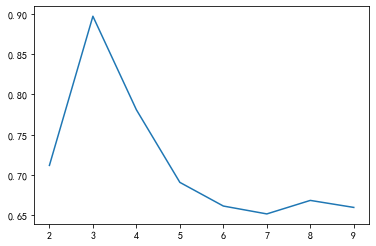

In [271]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(K,coef) # K为x轴输出，coef是y轴输出
plt.show()

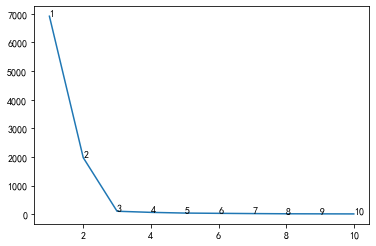

In [273]:
# 确定k值
k = np.arange(1,11)
jarr = []
for i in k:
    model = KMeans(n_clusters=i)
    model.fit(data)
    jarr.append(model.inertia_)
    # 给这几个点打标
    plt.annotate(str(i),(i,model.inertia_))
plt.plot(k,jarr)
plt.show()
# # 经确定，k=4


In [274]:
k = 3

In [275]:
# 正式定义模型
model1 = KMeans(n_clusters=k)
# 跑模型
model1.fit(data)
# 需要知道每个类别有哪些参数
C_i = model1.predict(data)
# 还需要知道聚类中心的坐标
Muk = model1.cluster_centers_

In [ ]:
Muk

array([[1.97322308],
       [1.13013687],
       [2.8687213 ]])